# BAGECO 2025 - Metagenomics Workshop

**From Microbial Ecology to AI – Basics in Machine learning**

*This class was developed for the 17th Symposium on Bacterial Genetics and Ecology (BAGECO 2025) and will be presented at the Metagenomics Workshop on 30.06.2025.*

*For any questions regarding this material, please contact:*

*Breno L. S. de Almeida: breno-livio.silva-de-almeida@ufz.de*

---

This Jupyter Notebook demonstrates basic examples in Machine Learning without requiring any local installation.

The demonstration includes examples for focused for classification:

1. From Toy Datasets to ML Models

  - Exploratory Data Analysis (EDA)

  - k-Nearest Neighbors (k-NN)

  - Random Forest
  
  - Support Vector Machine (SVM)

2. Evaluating your models

  - Metrics to consider

  - Cross-validation

3. Extracting features from biological sequences

  - MathFeature

  - Classification

---

## 1. From Toy Datasets to ML Models

We'll start by training and testing three simple classifiers:
- k-Nearest Neighbors (k-NN)
- Random Forest
- Support Vector Machine (SVM)

We'll use a toy dataset provided by scikit-learn: the **Iris** dataset

## 1.1 Exploratory Data Analysis (EDA)

Let's first explore the Iris dataset:

- Check shapes and target classes
- Visualize feature distributions
- Check correlations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Show first rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can see the classes are evenly distributed.

In [2]:
print("Dataset shape:", df.shape)
print("\nClass distribution:")
print(df['target'].value_counts())

Dataset shape: (150, 5)

Class distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


We can also observe possible correlation between the three classes in the following way.

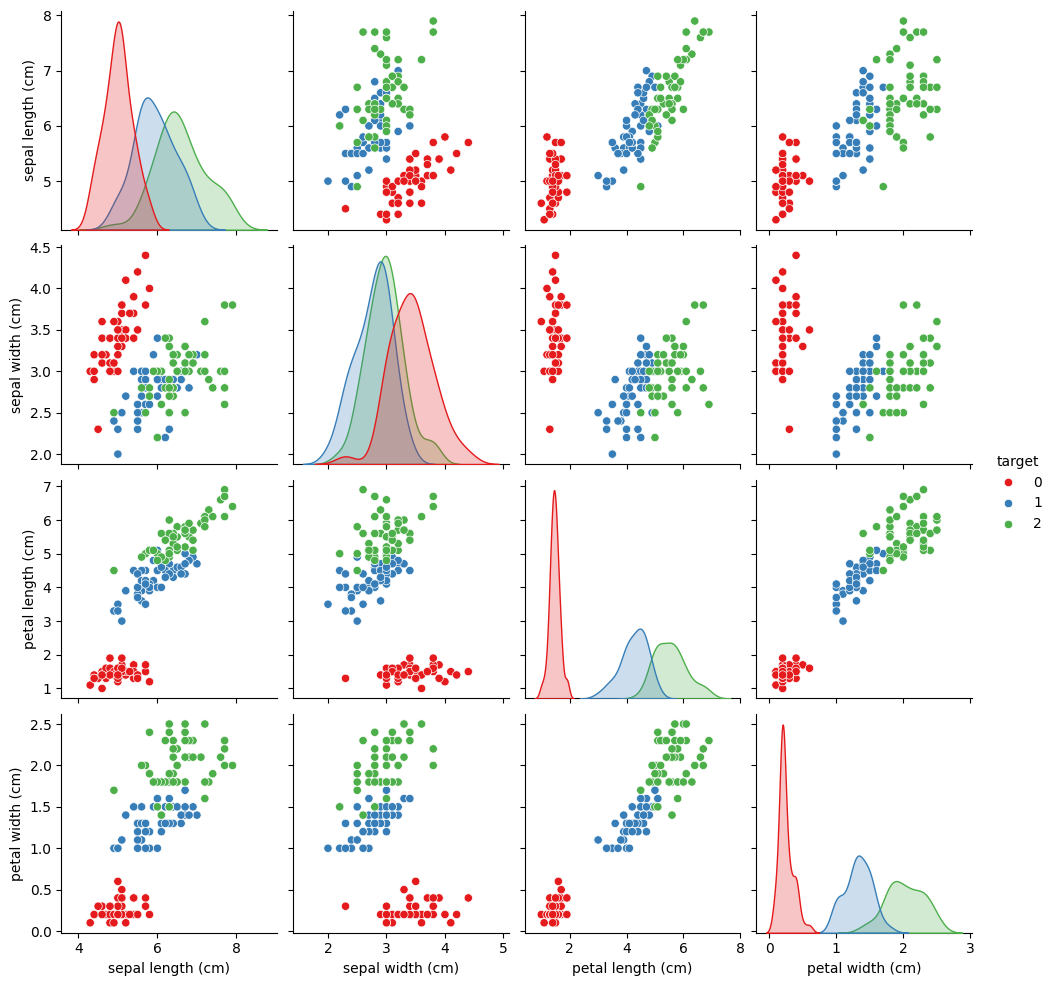

In [3]:
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

Or we can see the correlation between variables using heatmap and Pearson correlation.

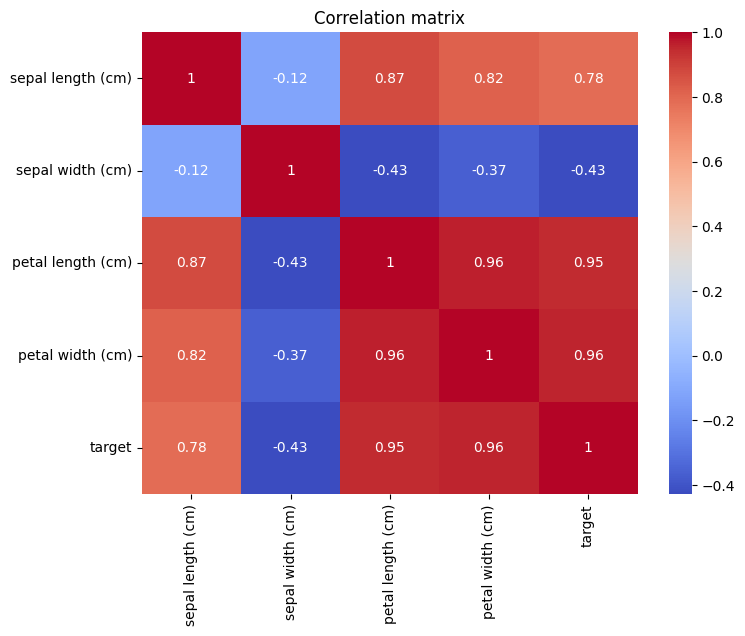

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

Before training, it's recommended to scale our features since many classifiers are sensitive to feature magnitudes. Standardization is a common scaling technique that centers each feature around zero with unit variance.

When applying standardization, we should compute the mean and standard deviation only from the training set and use these parameters to transform both the training and validation/test sets. This prevents data leakage and ensures a realistic evaluation.

The following code splits the data into a 70% training set and a 30% validation/test set:

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 1.66119088, -0.34116698,  1.41660741,  0.76797223],
       [ 0.26392752, -0.34116698,  0.51547131,  0.25106784],
       [ 0.49680475, -0.56093712,  0.74075533,  0.38029394],
       [ 0.49680475,  0.53791358,  0.51547131,  0.50952003],
       [ 0.26392752, -0.12139684,  0.62811332,  0.76797223],
       [ 0.9625592 ,  0.0983733 ,  1.02236036,  1.5433288 ],
       [-0.43470415, -1.65978782,  0.12122426,  0.12184175],
       [-0.31826554, -1.22024754,  0.06490325, -0.13661044],
       [-0.55114277,  0.75768372, -1.17415888, -1.29964531],
       [ 1.19543642,  0.0983733 ,  0.74075533,  1.41410271],
       [-0.08538832,  2.07630456, -1.45576392, -1.29964531],
       [-1.7155289 , -0.12139684, -1.39944291, -1.29964531],
       [ 0.9625592 , -1.22024754,  1.13500238,  0.76797223],
       [ 0.72968197, -0.12139684,  0.96603936,  0.76797223],
       [-0.78401999,  0.75768372, -1.3431219 , -1.29964531],
       [ 0.38036614,  0.75768372,  0.90971835,  1.41410271],
       [-1.13333583, -1.

To demonstrate the impact of feature scaling, let's do a comparison with plots considering the two scenarios:

Without Scaling: Raw features may skew model performance due to varying scales.

With Standardization: Features are centered (mean = 0) and scaled (variance = 1) for fairer weighting.

This comparison highlights why preprocessing matters, especially for distance-based or gradient-optimized models.

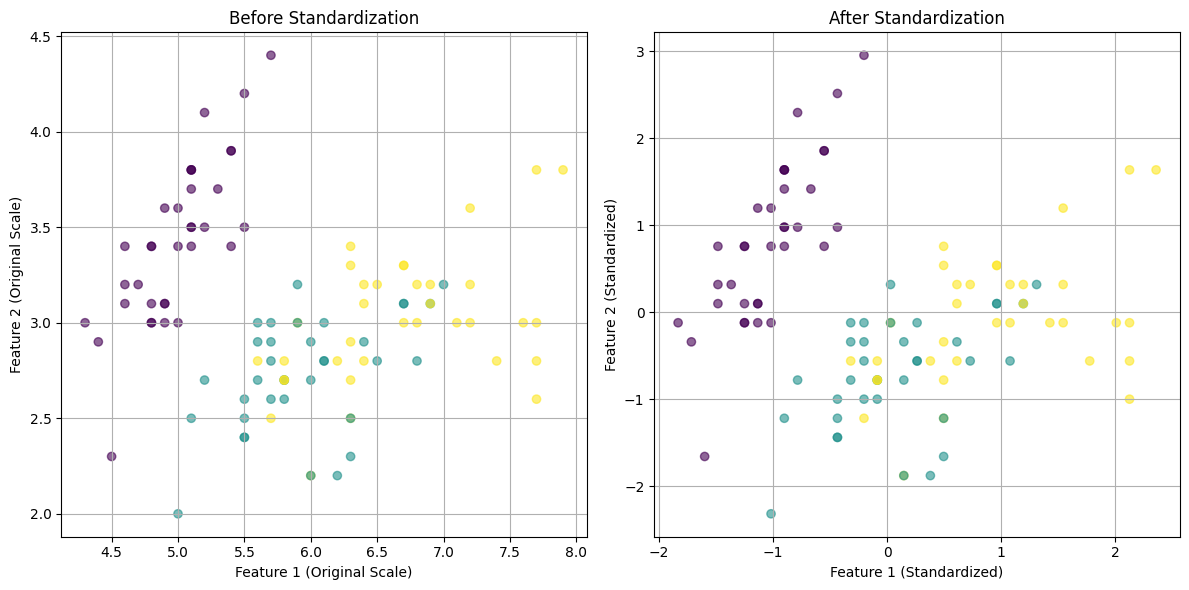

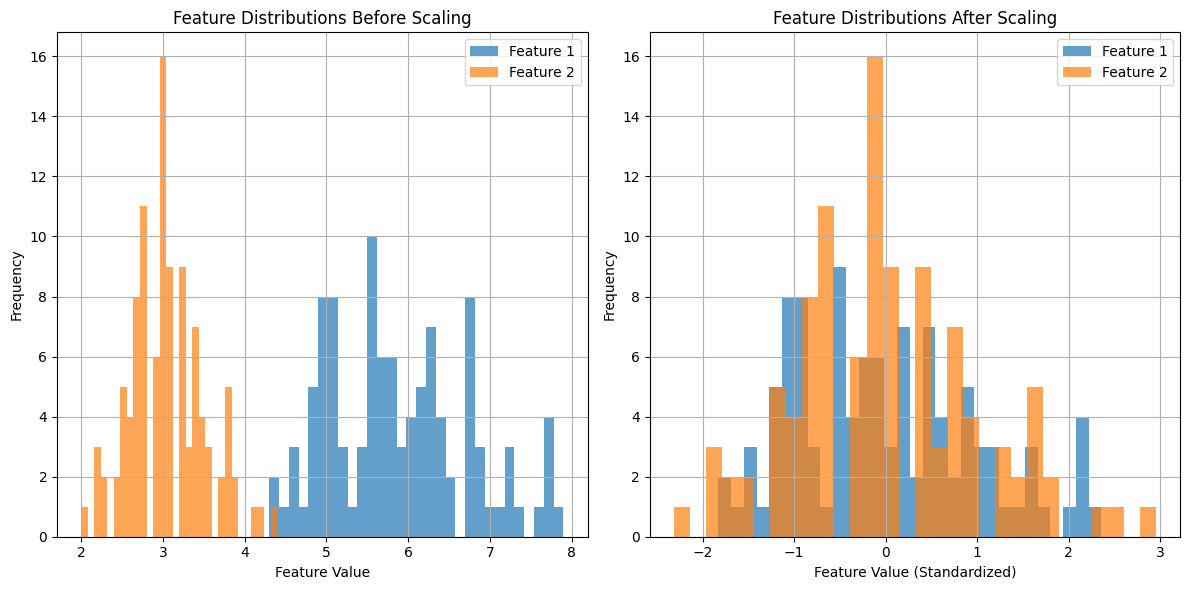

In [13]:
# Create subplots
plt.figure(figsize=(12, 6))

# Before scaling
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.6, cmap='viridis')
plt.title('Before Standardization')
plt.xlabel('Feature 1 (Original Scale)')
plt.ylabel('Feature 2 (Original Scale)')
plt.grid(True)

# After scaling
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.6, cmap='viridis')
plt.title('After Standardization')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Additional plot showing feature distributions
plt.figure(figsize=(12, 6))

# Plot feature distributions before scaling
plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=30, alpha=0.7, label='Feature 1')
plt.hist(X_train[:, 1], bins=30, alpha=0.7, label='Feature 2')
plt.title('Feature Distributions Before Scaling')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Plot feature distributions after scaling
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=30, alpha=0.7, label='Feature 1')
plt.hist(X_train_scaled[:, 1], bins=30, alpha=0.7, label='Feature 2')
plt.title('Feature Distributions After Scaling')
plt.xlabel('Feature Value (Standardized)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 1.2 k-Nearest Neighbors (k-NN)

k-Nearest Neighbors (k-NN) is a simple yet powerful supervised learning algorithm used for both classification and regression. The core idea is that similar data points (neighbors) tend to have similar labels.

For classification:

1. The algorithm stores all training samples

2. When predicting a new point, it finds the k closest training examples

3. The predicted class is the majority vote among these neighbors

We typically choose odd numbers for k to avoid ties in binary classification. For multi-class problems (like the Iris dataset with 3 classes), higher odd numbers help prevent ties.

We will use `Pipeline` from scikit-learn which will automatically do the standardization as we did before and do predictive tasks next.

Important: k-NN relies on distance calculations (commonly Euclidean distance). Features on larger scales can dominate the distance computation, making the algorithm biased toward those features. Scaling or standardizing your data (e.g., using StandardScaler or MinMaxScaler) ensures that all features contribute equally to the distance metric, leading to more balanced and accurate predictions.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create pipeline with scaling and k-NN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5)) # k=5
])

# Train and evaluate
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"k-NN accuracy: {acc_knn:.4f}")

k-NN accuracy: 0.9111



In the plot below, we visualize the decision boundaries of the k-Nearest Neighbors (k-NN) classifier on the classic **Iris dataset**, after reducing its dimensionality to 2 principal components using **PCA (Principal Component Analysis)**.

The axes indicate the percentage of variance explained by each principal component, giving us an idea of how much of the original data's structure is preserved in this 2D projection.

We trained and compared k-NN classifiers with different values of *k*. The goal was to see how the choice of *k* affects the complexity of the decision boundary and the model's accuracy.

### Underfitting, overfitting and choice of *k*
- **Small k (e.g., k=1):** The model creates very flexible and complex decision boundaries, which can capture fine details of the training data. This often risks *overfitting*, but can sometimes perform very well if the data has clearly separated classes.
- **Large k (e.g., k=5):** The model creates smoother, simpler boundaries. While this can prevent overfitting, it may cause *underfitting*, where the model becomes too simplistic and fails to capture meaningful patterns.

In this specific case, the plot shows that **k=1 achieved the highest test accuracy**. This suggests that, in this dataset, the classes are relatively well-separated and the model benefits from being more flexible rather than overly smooth.

### Plot details
- Circles (○) represent training samples; triangles (△) represent test samples.
- Different colors correspond to the different iris species.
- The background shows the regions assigned to each class by the trained k-NN classifier.

By visually comparing the plots for different values of *k*, we can directly observe how the decision boundaries change in complexity and how this impacts the model's accuracy on the test set.

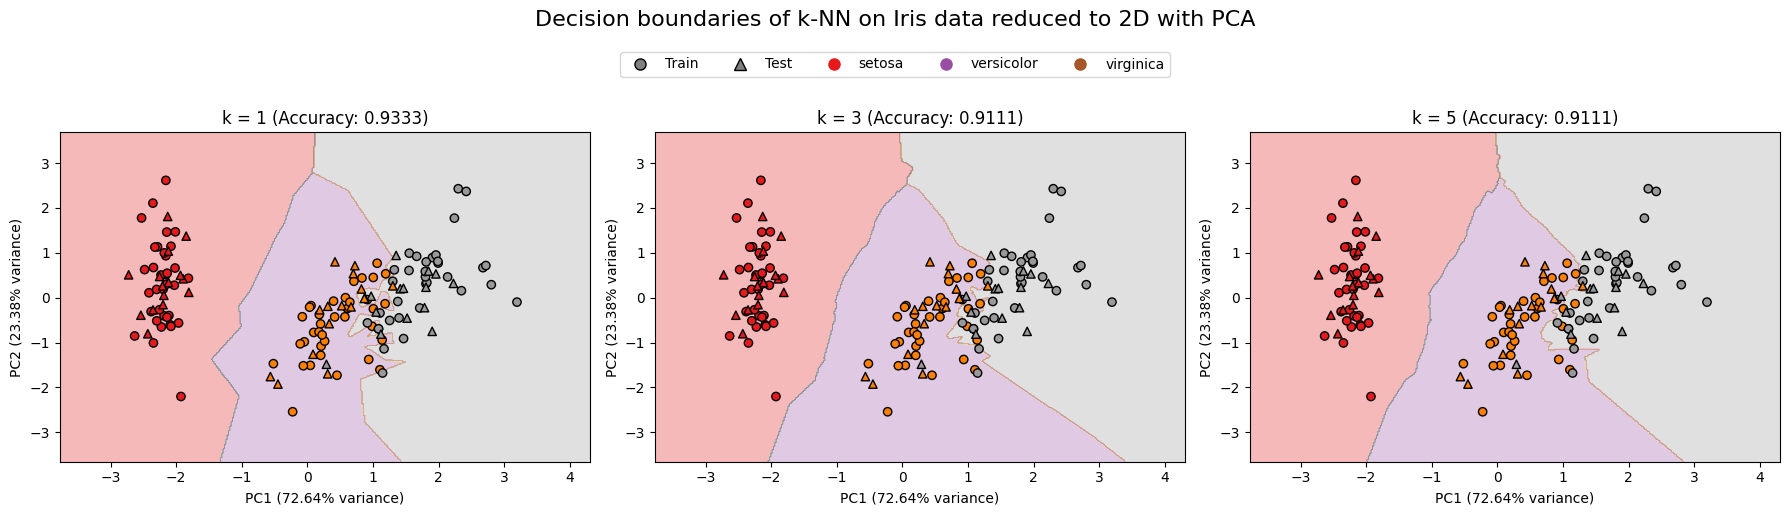

In [29]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Visualization pipeline (includes PCA)
viz_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Reduce to 2D for plotting
])

# Transform data for visualization
X_train_viz = viz_pipeline.fit_transform(X_train)
X_test_viz = viz_pipeline.transform(X_test)

# Get explained variance for axis labels
pca = viz_pipeline.named_steps['pca']
explained_var = pca.explained_variance_ratio_

# Also transform the whole dataset for visualization (for smoother boundary)
X_viz = viz_pipeline.fit_transform(X)

# Define k values
k_values = [1, 3, 5]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, k in zip(axes, k_values):
    # Train k-NN classifier on training data (reduced)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_viz, y_train)

    # Predict test set for accuracy
    acc = clf.score(X_test_viz, y_test)

    # Create a mesh grid
    x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
    y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

    # Plot training and test points
    scatter = ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1, marker='o', label='Train')
    ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Set1, marker='^', label='Test')

    ax.set_title(f"k = {k} (Accuracy: {acc:.4f})")
    ax.set_xlabel(f"PC1 ({explained_var[0]*100:.2f}% variance)")
    ax.set_ylabel(f"PC2 ({explained_var[1]*100:.2f}% variance)")

# Create custom legend
handles = [
    Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='gray', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='^', color='w', label='Test', markerfacecolor='gray', markersize=8, markeredgecolor='k')
]

# Add class color markers
for idx, class_name in enumerate(target_names):
    handles.append(Line2D([0], [0], marker='o', color=plt.cm.Set1(idx/len(target_names)), label=class_name, markersize=8, linestyle=''))

fig.legend(handles=handles, loc='upper center', ncol=5, fontsize='medium', bbox_to_anchor=(0.5, 0.95))

plt.suptitle("Decision boundaries of k-NN on Iris data reduced to 2D with PCA", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

## 1.3 Random Forest

Random Forest is a versatile and robust supervised learning algorithm that can be used for both classification and regression tasks. It belongs to the family of ensemble methods, where the idea is to combine multiple models (in this case, decision trees) to produce a more accurate and stable prediction.

For classification:

1. The algorithm builds multiple decision trees on different random subsets of the training data and features.

2. Each tree makes its own prediction about the class of a new data point.

3. The final predicted class is chosen by majority vote among all trees.

By aggregating the predictions of many trees, Random Forest reduces the risk of overfitting that individual decision trees often face and generally achieves better generalization performance.

We will also use Pipeline from scikit-learn to handle preprocessing steps like standardization automatically, keeping our workflow clean and reproducible.

Important: Random Forest can handle data where features have different scales because it is based on decision trees, which split data based on feature thresholds rather than distance calculations. However, scaling can still be useful, especially if we plan to compare Random Forest with algorithms that rely on distances (like k-NN) or gradient-based methods. Scaling can also help improve training stability and convergence when Random Forest is part of a larger pipeline.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create pipeline with scaling and Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for Random Forest
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)) # 100 trees
])

# Train and evaluate
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest accuracy: {acc_rf:.4f}")

Random Forest accuracy: 0.8889


In the plot below, we visualize the decision boundaries of the Random Forest classifier on the classic Iris dataset, after reducing its dimensionality to 2 principal components using PCA.

The axes indicate the percentage of variance explained by each principal component, helping us understand how much of the original data's structure is preserved in this 2D projection.

We trained and compared Random Forest models with different numbers of trees (n_estimators). The goal was to see how the number of trees affects the smoothness of the decision boundary and the model's predictive performance.

Underfitting, overfitting and choice of n_estimators
Few trees (e.g., n_estimators=1): The model relies on a single decision tree, which tends to create sharp, irregular decision boundaries that can overfit the training data.

More trees (e.g., n_estimators=10 or n_estimators=100): The ensemble effect smooths the decision boundaries by averaging predictions from multiple trees, which helps reduce variance and typically improves generalization on unseen data.

In this specific case, the plot shows that using more trees improved test accuracy and resulted in cleaner, more robust boundaries. This illustrates the power of ensemble methods: combining multiple weak learners (trees) to form a strong learner.

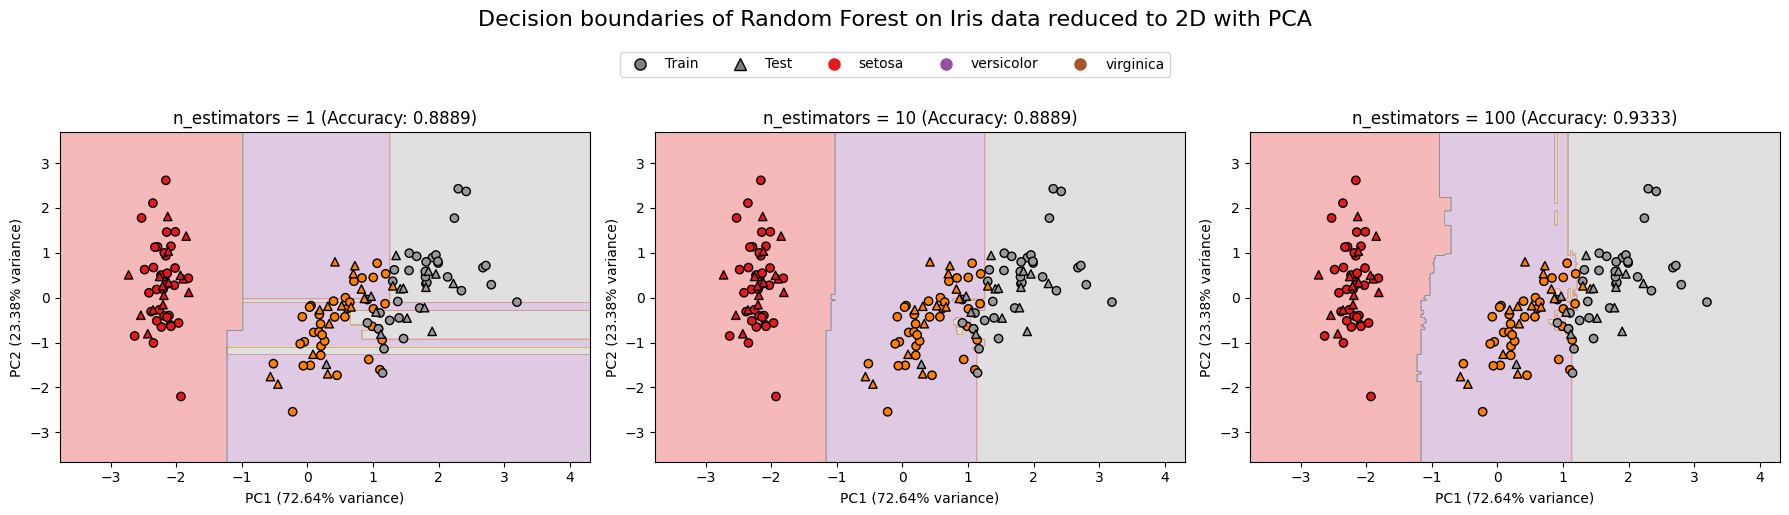

In [31]:
# Visualization pipeline (includes scaling and PCA)
viz_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Reduce to 2D for plotting
])

# Transform data for visualization
X_train_viz = viz_pipeline.fit_transform(X_train)
X_test_viz = viz_pipeline.transform(X_test)

# Get explained variance for axis labels
pca = viz_pipeline.named_steps['pca']
explained_var = pca.explained_variance_ratio_

# Also transform the whole dataset for visualization (for smoother boundary)
X_viz = viz_pipeline.fit_transform(X)

# Define number of estimators to compare
n_estimators_list = [1, 10, 100]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, n_estimators in zip(axes, n_estimators_list):
    # Train Random Forest classifier on training data (reduced)
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train_viz, y_train)

    # Predict test set for accuracy
    acc = clf.score(X_test_viz, y_test)

    # Create a mesh grid
    x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
    y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

    # Plot training and test points
    ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1, marker='o', label='Train')
    ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Set1, marker='^', label='Test')

    ax.set_title(f"n_estimators = {n_estimators} (Accuracy: {acc:.4f})")
    ax.set_xlabel(f"PC1 ({explained_var[0]*100:.2f}% variance)")
    ax.set_ylabel(f"PC2 ({explained_var[1]*100:.2f}% variance)")

# Create custom legend
handles = [
    Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='gray', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='^', color='w', label='Test', markerfacecolor='gray', markersize=8, markeredgecolor='k')
]

# Add class color markers
for idx, class_name in enumerate(target_names):
    handles.append(Line2D([0], [0], marker='o', color=plt.cm.Set1(idx/len(target_names)), label=class_name, markersize=8, linestyle=''))

fig.legend(handles=handles, loc='upper center', ncol=5, fontsize='medium', bbox_to_anchor=(0.5, 0.95))

plt.suptitle("Decision boundaries of Random Forest on Iris data reduced to 2D with PCA", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

## 1.4 Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used mainly for classification tasks, but it can also handle regression. The core idea of SVM is to find the optimal hyperplane that best separates classes in the feature space.

For classification:

1. The algorithm identifies the boundary (hyperplane) that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class (called support vectors).

2. New data points are classified based on which side of this hyperplane they fall on.

By focusing on maximizing this margin, SVM aims to create a decision boundary that is both robust and has good generalization capability on unseen data.

Important: SVM is highly sensitive to the scale of the features because it relies on calculating distances to determine the optimal hyperplane. Features with larger scales can disproportionately influence the model, leading to biased boundaries. Therefore, it is crucial to scale or standardize your data (e.g., using StandardScaler) to ensure that all features contribute equally, resulting in more balanced and accurate decision boundaries.

In [32]:
from sklearn.svm import SVC

# Create pipeline with scaling and SVM classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # important for SVM
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42))  # RBF kernel with default C=1.0
])

# Train and evaluate
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM accuracy: {acc_svm:.4f}")

SVM accuracy: 0.9333


In the plot below, we visualize the decision boundaries of the Support Vector Machine (SVM) classifier on the classic Iris dataset, after reducing its dimensionality to 2 principal components using PCA.

The axes indicate the percentage of variance explained by each principal component, helping us understand how much of the original data's structure is preserved in this 2D projection.

We trained and compared SVM models with different values of the regularization parameter C. The goal was to see how C affects the flexibility of the decision boundary and the model's predictive performance.

Underfitting, overfitting and choice of C
Small C (e.g., C=0.1): The model tries to maximize the margin more aggressively, allowing some misclassifications to keep the boundary smooth and simple. This can cause underfitting, where the model fails to capture all patterns in the data.

Large C (e.g., C=10 or C=100): The model penalizes misclassification more heavily, creating more complex and tighter decision boundaries that fit the training data closely. This can risk overfitting, capturing noise along with the signal.

In this specific case, the plot shows that increasing C made the decision boundary more flexible and improved test accuracy up to a point. This highlights the importance of tuning C to balance bias and variance in SVM.

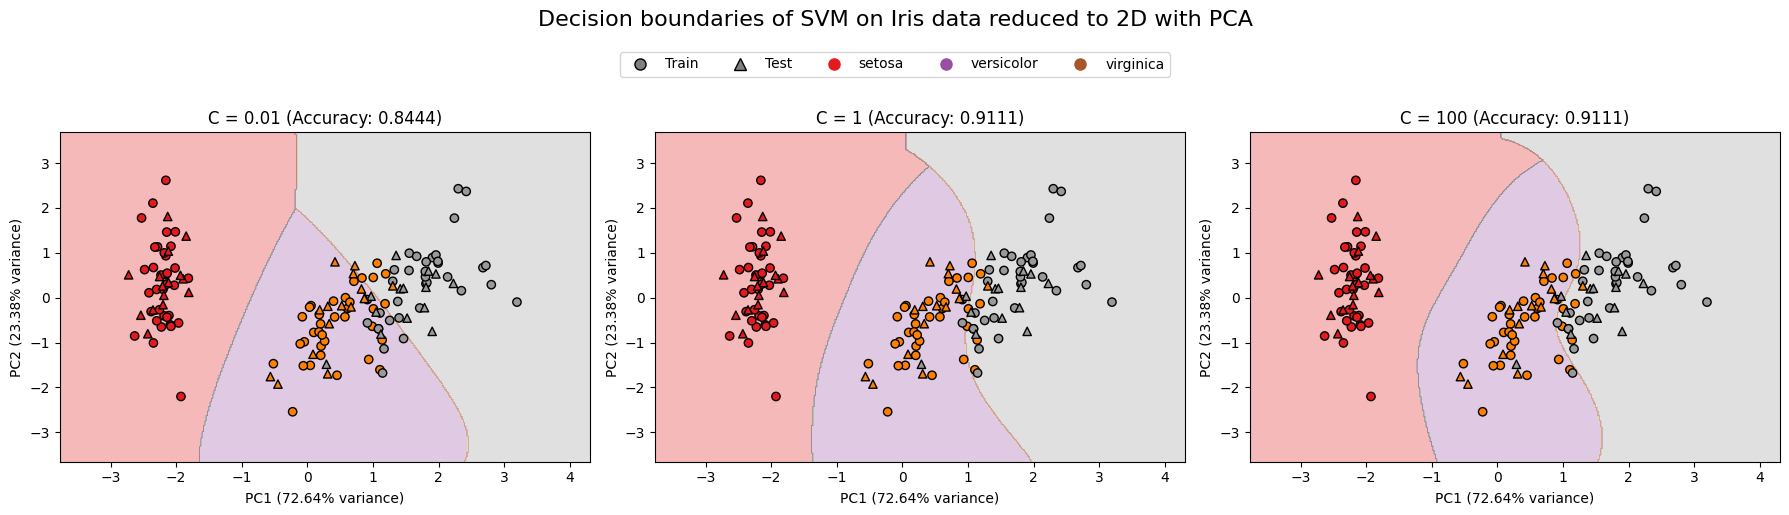

In [35]:
# Visualization pipeline (includes scaling and PCA)
viz_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Reduce to 2D for plotting
])

# Transform data for visualization
X_train_viz = viz_pipeline.fit_transform(X_train)
X_test_viz = viz_pipeline.transform(X_test)

# Get explained variance for axis labels
pca = viz_pipeline.named_steps['pca']
explained_var = pca.explained_variance_ratio_

# Also transform the whole dataset for visualization (for smoother boundary)
X_viz = viz_pipeline.fit_transform(X)

# Define C values to compare (regularization strength)
C_values = [0.01, 1, 100]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, C in zip(axes, C_values):
    # Train SVM classifier on training data (reduced)
    clf = SVC(C=C, kernel='rbf', random_state=42)
    clf.fit(X_train_viz, y_train)

    # Predict test set for accuracy
    acc = clf.score(X_test_viz, y_test)

    # Create a mesh grid
    x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
    y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

    # Plot training and test points
    ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1, marker='o', label='Train')
    ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Set1, marker='^', label='Test')

    ax.set_title(f"C = {C} (Accuracy: {acc:.4f})")
    ax.set_xlabel(f"PC1 ({explained_var[0]*100:.2f}% variance)")
    ax.set_ylabel(f"PC2 ({explained_var[1]*100:.2f}% variance)")

# Create custom legend
handles = [
    Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='gray', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='^', color='w', label='Test', markerfacecolor='gray', markersize=8, markeredgecolor='k')
]

# Add class color markers
for idx, class_name in enumerate(target_names):
    handles.append(Line2D([0], [0], marker='o', color=plt.cm.Set1(idx/len(target_names)), label=class_name, markersize=8, linestyle=''))

fig.legend(handles=handles, loc='upper center', ncol=5, fontsize='medium', bbox_to_anchor=(0.5, 0.95))

plt.suptitle("Decision boundaries of SVM on Iris data reduced to 2D with PCA", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

## 2. Evaluating your models

Accuracy alone can be misleading, especially with imbalanced datasets, where one class dominates. For example, a model predicting only the majority class can have high accuracy but fail to detect important minority cases.

To get a clearer picture, consider other metrics like:

- Precision: How many predicted positives are correct?

- Recall: How many actual positives are detected?

- F1-Score: Balance between precision and recall.

- Confusion Matrix: Detailed breakdown of true/false positives and negatives.

Additionally, use cross-validation to evaluate models more reliably by testing them across multiple data splits, reducing bias from a single train-test division and ensuring better generalization.

## 2.1 Metrics to consider

### Accuracy

Accuracy is the proportion of total correct predictions (both positive and negative) out of all predictions made:


$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


- **TP** = True Positives (correctly predicted positives)  
- **TN** = True Negatives (correctly predicted negatives)  
- **FP** = False Positives (incorrectly predicted positives)  
- **FN** = False Negatives (incorrectly predicted negatives)  

### Precision

Precision measures the quality of positive predictions — the proportion of predicted positives that are actually positive:


$$\text{Precision} = \frac{TP}{TP + FP}$$

A high precision means the model makes few false positive errors.

### Recall (Sensitivity)

Recall measures the ability of the model to find all actual positive cases:

$$\text{Recall} = \frac{TP}{TP + FN}$$

A high recall means the model detects most of the positive instances.

### F1-Score

The F1-score is the harmonic mean of precision and recall, balancing both metrics into a single value:

$$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

It is useful when you want to balance false positives and false negatives.

### Confusion Matrix

The confusion matrix summarizes the counts of true and false predictions broken down by class:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN)|
| **Actual Negative** | False Positive (FP)| True Negative (TN) |

---

Let's evaluate our models using these metrics. We will begin using the k-NN classifier.


k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



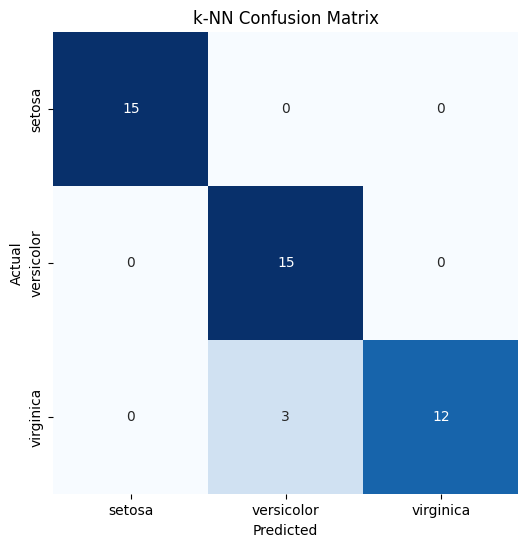

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# k-NN Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # important for distance-based algorithms
    ('knn', KNeighborsClassifier(n_neighbors=1))  # k=1
])

evaluate_model(knn_pipeline, X_train, y_train, X_test, y_test, "k-NN")

Next we will evaluate our model using the Random Forest classifier.


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



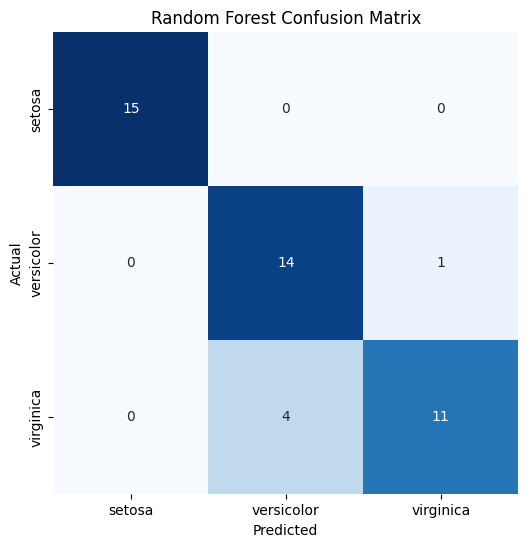

In [42]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  # 100 trees
])

evaluate_model(rf_pipeline, X_train, y_train, X_test, y_test, "Random Forest")

Finally, we evaluate our model using SVM.


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



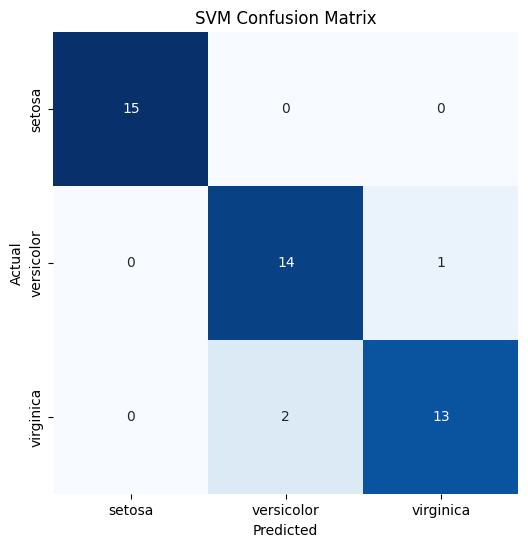

In [43]:
# SVM Pipeline (same as your example)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # important for SVM
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42))  # RBF kernel with default C=1.0
])

evaluate_model(svm_pipeline, X_train, y_train, X_test, y_test, "SVM")

## 2.2 Cross-validation

Cross-validation (CV) is a resampling technique used to evaluate machine learning models by training and testing them on different subsets of the data. Instead of just splitting the data into a single train-test set, cross-validation divides it into multiple folds, ensuring that every data point gets used for both training and testing.

- Why Use Cross-Validation?

Reduces Overfitting: By testing on multiple splits, we get a better sense of how the model generalizes.

Better Performance Estimation: A single train-test split can be biased depending on how the data is divided. CV averages results across folds for a more reliable estimate.

Optimal Hyperparameter Tuning: Helps in selecting the best model parameters without data leakage.

- 10-Fold Cross-Validation

In k-fold cross-validation, the dataset is split into k equal parts (folds). The model is trained on k-1 folds and tested on the remaining 1 fold. This process repeats k times, with each fold serving as the test set once. Finally, performance metrics (e.g., accuracy) are averaged across all folds.

For 10-fold CV:

The dataset is divided into 10 parts.

The model is trained on 9 folds and tested on the remaining 1 fold.

This repeats 10 times, and the average performance is reported.

Applying 10-Fold CV to Compare k-NN, Random Forest, and SVM
We will use `cross_val_score` from scikit-learn to evaluate each model with 10-fold CV and compare their performance. Note you can define a different scoring for evaluation.

In [49]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores_knn = cross_val_score(knn_pipeline, X, y, cv=10, scoring="accuracy")
cv_scores_rf = cross_val_score(rf_pipeline, X, y, cv=10, scoring="accuracy")
cv_scores_svm = cross_val_score(svm_pipeline, X, y, cv=10, scoring="accuracy")

print(f"k-NN mean CV accuracy: {cv_scores_knn.mean():.4f} +- {cv_scores_knn.std():.4f}")
print(f"Random Forest mean CV accuracy: {cv_scores_rf.mean():.4f} +- {cv_scores_rf.std():.4f}")
print(f"SVM mean CV accuracy: {cv_scores_svm.mean():.4f} +- {cv_scores_svm.std():.4f}")

k-NN mean CV accuracy: 0.9533 +- 0.0670
Random Forest mean CV accuracy: 0.9667 +- 0.0333
SVM mean CV accuracy: 0.9667 +- 0.0447


## 3. Extracting features from biological sequences

## 3.1 MathFeature

## 3.2 Classification